!mkdir -p ~/aiffel/songys_chatbot

In [11]:
import tensorflow as tf
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ds = pd.read_csv(os.getenv("HOME")+'/aiffel/transformer_chatbot/data/ChatbotData .csv')

In [64]:
ds.head(10)

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
5,SD카드 망가졌어,다시 새로 사는 게 마음 편해요.,0
6,SD카드 안돼,다시 새로 사는 게 마음 편해요.,0
7,SNS 맞팔 왜 안하지ㅠㅠ,잘 모르고 있을 수도 있어요.,0
8,SNS 시간낭비인 거 아는데 매일 하는 중,시간을 정하고 해보세요.,0
9,SNS 시간낭비인데 자꾸 보게됨,시간을 정하고 해보세요.,0


In [16]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11823 entries, 0 to 11822
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q       11823 non-null  object
 1   A       11823 non-null  object
 2   label   11823 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 277.2+ KB


In [31]:
print(len(ds))

11823


In [32]:
ds.tail()

,Q,A,label
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2
11822,힘들어서 결혼할까봐,도피성 결혼은 하지 않길 바라요.,2


label이 뭘 의미하는 거지?

In [93]:
ahffk_c = 0

q_1 = []
a_1 = []


for ahffk in ds['label']:
    if ahffk == 1:
        q_1.append(ds['Q'][ahffk_c])
        a_1.append(ds['A'][ahffk_c])
    ahffk_c += 1

print('Q_1: ',q_1[:10],'\n\nA_1: ',a_1[:10])
print(len(q_1))


ahffk_c = 0


q_2 = []
a_2 = []

for ahffk in ds['label']:
    if ahffk == 2:
        q_2.append(ds['Q'][ahffk_c])
        a_2.append(ds['A'][ahffk_c])
    ahffk_c += 1
    
print('\n\nQ_2: ',q_2[:10],'\n\nA_2: ',a_2[:10])
print(len(q_2))

Q_1:  ['1000일 만난 여자친구와 이별', '10년 연애. 헤어졌습니다.', '10년 연애사 되돌아보니 다 부질없네', '10년 연예의끝', '10년만나다 헤어지네', '10년이라는 시간이 참 무색하다 싶네', '10월의 마지막밤 . 더 보고싶네 그사람', '14년된 여자친구랑 이별', '14년의 기나긴 이야기.', '15년…안녕'] 

A_1:  ['더 오래 만날 사람 만날 거예요.', '더 공허함이 크시겠네요.', '더 좋은 사람 만나실 거예요.', '더 마음이 허하겠어요.', '충분히 슬퍼하고 충분히 아파하다가 이겨내세요.', '함께 걸은 길을 혼자 돌아가고 계시겠네요.', '이별은 보고 싶은 마음을 참는 과정이죠.', '충분히 슬퍼하고 충분히 아파하다가 이겨내세요.', '좋은 연애였길 바라요.', '시간이 무색하네요.']
3570


Q_2:  ['짝사랑만큼 고통스러운 건 없겠지.', '1년 넘게 만났는데 지금도 불타올라', '1년 동거 중인데 계속 좋아', '1년 동거하고 결혼했어', '1년 만났는데도 그 사람에 대해 잘 모르겠어', '1년반 만났는데 결혼하자고 해도 될까?', '1년째 동거중이야', '1년째 좋아하는 사람이 있어.', '2년 가량의 연애', '2년 만났는데도 잘 모르는 부분이 많은 거 같아'] 

A_2:  ['짝사랑 만큼 감정소모가 큰 건 없을 거예요.', '정열적인 사랑을 하고 있나봐요.', '서로 깊게 알게되면서 더 좋아졌나봅니다.', '축하합니다!', '더 만나보세요.', '기다리고 있을지도 몰라요.', '서로 알아가는 단계인가봐요.', '힘든 시간이었겠어요.', '딱 잘 만났네요.', '양파같은 사람이네요.']
2963


음...label이 뭘 의미하는지 전혀 모르겠다

각 레이블마다 내가 느낀 특징을 적어보자
<br/>
1:
<br/>
굉장히 가벼운 질문이나 대화가 많다
<br/>
아주 가벼운 대화를 하는 거 같다
<br/>
2:
슬픈 주제가 상당하다
<br/>
챗봇이 위로해주는 문장을 말한다
<br/>
3:
<br/>
불안감을 표현하는 문장이 많은 거 같다
<br/>
챗봇이 불안감을 없애주기 위한 답변을 해준다
<br/>

물론 대략 3천 혹은 2천개 되는 데이터를 전부 보고 판단한 건 아니지만..
<br/>
나중에 감정을 파악하는 모델을 가지고 함 분석해봐야 겠다

In [91]:
# 사용할 샘플의 최대 개수
MAX_SAMPLES = 50000

# 전처리 함수
def preprocess_sentence(sentence):
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)

  # (a-z, A-Z, ".", "?", "!", ",")를 제외한 모든 문자를 공백인 ' '로 대체합니다.
    sentence = re.sub(r"[^0-9ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z?.!,]+", " ", sentence)
    sentence = sentence.strip()
    return sentence


In [92]:
print(preprocess_sentence("Youtube 보고 싶은데, 123모여서 같이봐도 돼??^^"))

Youtube 보고 싶은데 , 123모여서 같이봐도 돼 ? ?


In [94]:
def load_conversations(data):
    inputs, outputs = [], []
    for i in range(len(data)):
        inputs.append(preprocess_sentence(data['Q'][i]))
        outputs.append(preprocess_sentence(data['A'][i]))
    assert len(inputs) == len(outputs) and len(inputs) == len(data)
    return inputs, outputs

In [99]:
questions, answers = load_conversations(ds)

print(questions[:10])
print(answers[:10])

print('전체 샘플 수 :', len(questions))
print('전체 샘플 수 :', len(answers))

['12시 땡 !', '1지망 학교 떨어졌어', '3박4일 놀러가고 싶다', '3박4일 정도 놀러가고 싶다', 'PPL 심하네', 'SD카드 망가졌어', 'SD카드 안돼', 'SNS 맞팔 왜 안하지ㅠㅠ', 'SNS 시간낭비인 거 아는데 매일 하는 중', 'SNS 시간낭비인데 자꾸 보게됨']
['하루가 또 가네요 .', '위로해 드립니다 .', '여행은 언제나 좋죠 .', '여행은 언제나 좋죠 .', '눈살이 찌푸려지죠 .', '다시 새로 사는 게 마음 편해요 .', '다시 새로 사는 게 마음 편해요 .', '잘 모르고 있을 수도 있어요 .', '시간을 정하고 해보세요 .', '시간을 정하고 해보세요 .']
전체 샘플 수 : 11823
전체 샘플 수 : 11823


In [100]:
print('전처리 후의 22번째 질문 샘플: {}'.format(questions[21]))
print('전처리 후의 22번째 답변 샘플: {}'.format(answers[21]))

전처리 후의 22번째 질문 샘플: 가스비 장난 아님
전처리 후의 22번째 답변 샘플: 다음 달에는 더 절약해봐요 .


In [84]:
# 질문과 답변 데이터셋에 대해서 Vocabulary 생성. (Tensorflow 2.3.0 이상) (클라우드는 2.4 입니다)
tokenizer = ds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)


# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]


AttributeError: 'DataFrame' object has no attribute 'deprecated'

In [103]:
import tensorflow_datasets as tfds

tokenizer = tfds.features.text.SubwordTextEncoder.build_from_corpus(questions+answers,target_vocab_size=2**13)

start_token,end_token = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

print(start_token)
print(end_token)


AttributeError: module 'tensorflow_datasets.core.features' has no attribute 'text'

In [108]:
print(dir(tfds.features))

print(dir(tfds.features.Text))

print(dir(tfds.features.tensor_feature))

['Audio', 'BBox', 'BBoxFeature', 'ClassLabel', 'Dataset', 'Encoding', 'FeatureConnector', 'FeaturesDict', 'Image', 'LabeledImage', 'Sequence', 'Tensor', 'TensorInfo', 'Text', 'Translation', 'TranslationVariableLanguages', 'Video', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'audio_feature', 'bounding_boxes', 'class_label_feature', 'dataset_feature', 'feature', 'features_dict', 'image_feature', 'labeled_image', 'sequence_feature', 'tensor_feature', 'text_feature', 'top_level_feature', 'translation_feature', 'video_feature']
['ALIASES', '__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__

tfds subwordtextencoder 공식 문서

https://www.tensorflow.org/datasets/api_docs/python/tfds/deprecated/text/SubwordTextEncoder

SubwordTextEncoder가 존재하는 경로를 잘못 알고 있어서 오류가 일어났다

In [110]:
import tensorflow_datasets as tfds

tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions+answers,target_vocab_size=2**13)

start_token,end_token = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

print(start_token)
print(end_token)


[8170]
[8171]


In [112]:
print('원래 질문 문장 샘플 : {}'.format(questions[21]))
print('원래 답변 문장 샘플 : {}'.format(answers[21]))
print('정수 인코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.encode(questions[21])))
print('정수 인코딩 후의 21번째 답변 샘플: {}'.format(tokenizer.encode(answers[21])))


원래 질문 문장 샘플 : 가스비 장난 아님
원래 답변 문장 샘플 : 다음 달에는 더 절약해봐요 .
정수 인코딩 후의 21번째 질문 샘플: [5762, 610, 2490, 4163]
정수 인코딩 후의 21번째 답변 샘플: [2356, 7510, 7, 6273, 97, 1]


In [113]:
# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8172


56


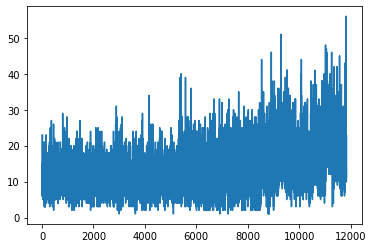

In [122]:
wkdans_scat = 0
wkdans_scatter = []
wkdans_max = 0

for wkdans in ds['Q']:
    if len(wkdans) > wkdans_max:
        wkdans_max = len(wkdans)
        wkdans_scatter.append(len(wkdans))
    if len(wkdans) > wkdans_scat:
        wkdans_scatter.append(len(wkdans))

print(wkdans_max)
plt.plot(wkdans_scatter)

In [124]:
# 샘플의 최대 허용 길이 또는 패딩 후의 최종 길이
MAX_LENGTH = 45

In [128]:
# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []
  
    for (sentence1, sentence2) in zip(inputs, outputs):
    # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
        sentence1 = start_token + tokenizer.encode(sentence1) + end_token
        sentence2 = start_token + tokenizer.encode(sentence2) + end_token

    # 최대 길이 40 이하인 경우에만 데이터셋으로 허용
        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)
  
  # 최대 길이 40으로 모든 데이터셋을 패딩
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
    return tokenized_inputs, tokenized_outputs


In [129]:
questions, answers = tokenize_and_filter(questions, answers)
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(answers)))

단어장의 크기 : 8172
필터링 후의 질문 샘플 개수: 11823
필터링 후의 답변 샘플 개수: 11823


tensorflow tensor_slices에 대한 공식 문서

https://www.tensorflow.org/api_docs/python/tf/data/Dataset

In [130]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)


In [131]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더에서 패딩을 위한 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='enc_padding_mask')(inputs)

  # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
  # 내부적으로 패딩 마스크도 포함되어져 있습니다.
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask,
        output_shape=(1, None, None),
        name='look_ahead_mask')(dec_inputs)

  # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
  # 디코더에서 패딩을 위한 마스크
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='dec_padding_mask')(inputs)

  # 인코더
    enc_outputs = encoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
    )(inputs=[inputs, enc_padding_mask])

  # 디코더
    dec_outputs = decoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 완전연결층
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)


In [132]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3146240     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [133]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)


In [134]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)


In [136]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])


In [137]:
EPOCHS = 20
model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/20
185/185 [==============================] - 17s 59ms/step - loss: 1.2822 - accuracy: 0.0277
Epoch 2/20
185/185 [==============================] - 11s 59ms/step - loss: 1.0427 - accuracy: 0.0437
Epoch 3/20
185/185 [==============================] - 11s 60ms/step - loss: 0.8902 - accuracy: 0.0448
Epoch 4/20
185/185 [==============================] - 11s 60ms/step - loss: 0.8234 - accuracy: 0.0482
Epoch 5/20
185/185 [==============================] - 11s 60ms/step - loss: 0.7712 - accuracy: 0.0512
Epoch 6/20
185/185 [==============================] - 11s 61ms/step - loss: 0.7181 - accuracy: 0.0546
Epoch 7/20
185/185 [==============================] - 11s 61ms/step - loss: 0.6608 - accuracy: 0.0598
Epoch 8/20
185/185 [==============================] - 11s 61ms/step - loss: 0.5973 - accuracy: 0.0669
Epoch 9/20
185/185 [==============================] - 11s 61ms/step - loss: 0.5274 - accuracy: 0.0745
Epoch 10/20
185/185 [==============================] - 11s 61ms/step - loss: 0.454

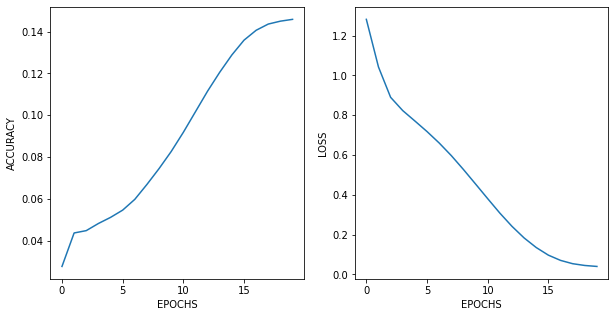

In [138]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.plot(model.history.history['accuracy'])

plt.subplot(122)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.plot(model.history.history['loss'])

In [145]:
def decoder_inference(sentence):
    sentence = preprocess_sentence(sentence)

  # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
  # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
    sentence = tf.expand_dims(
        start_token + tokenizer.encode(sentence) + end_token, axis=0)

  # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
  # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
    output_sequence = tf.expand_dims(start_token, 0)

  # 디코더의 인퍼런스 단계
    for i in range(MAX_LENGTH):
    # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
        predictions = model(inputs=[sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]

    # 현재 예측한 단어의 정수
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
        if tf.equal(predicted_id, end_token[0]):
            break

    # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
    # 이 output_sequence는 다시 디코더의 입력이 됩니다.
        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

    return tf.squeeze(output_sequence, axis=0)


In [146]:
def sentence_generation(sentence):
  # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
    prediction = decoder_inference(sentence)

  # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
    predicted_sentence = tokenizer.decode(
        [i for i in prediction if i < tokenizer.vocab_size])

    print('입력 : {}'.format(sentence))
    print('출력 : {}'.format(predicted_sentence))

    return predicted_sentence


In [148]:
sentence_generation('그림을 그리고 싶어')

sentence_generation("내가 그림으로 돈을 벌 수 있을지가 의문이야")

입력 : 그림을 그리고 싶어
출력 : 따뜻하게 사세요 .
입력 : 내가 그림으로 돈을 벌 수 있을지가 의문이야
출력 : 할인점에서 사먹으세요 .


'할인점에서 사먹으세요 .'

??????????????????????????????????????

인공지능이 날 놀리네;;

In [149]:
EPOCHS = 20
model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/20
185/185 [==============================] - 11s 60ms/step - loss: 0.0379 - accuracy: 0.1459
Epoch 2/20
185/185 [==============================] - 11s 60ms/step - loss: 0.0359 - accuracy: 0.1463
Epoch 3/20
185/185 [==============================] - 11s 60ms/step - loss: 0.0319 - accuracy: 0.1472
Epoch 4/20
185/185 [==============================] - 11s 60ms/step - loss: 0.0276 - accuracy: 0.1483
Epoch 5/20
185/185 [==============================] - 11s 61ms/step - loss: 0.0250 - accuracy: 0.1489
Epoch 6/20
185/185 [==============================] - 11s 61ms/step - loss: 0.0212 - accuracy: 0.1499
Epoch 7/20
185/185 [==============================] - 11s 61ms/step - loss: 0.0192 - accuracy: 0.1504
Epoch 8/20
185/185 [==============================] - 11s 61ms/step - loss: 0.0176 - accuracy: 0.1508
Epoch 9/20
185/185 [==============================] - 11s 61ms/step - loss: 0.0165 - accuracy: 0.1511
Epoch 10/20
185/185 [==============================] - 11s 60ms/step - loss: 0.014

In [150]:
sentence_generation('그림을 그리고 싶어')

sentence_generation("내가 그림으로 돈을 벌 수 있을지가 의문이야")

입력 : 그림을 그리고 싶어
출력 : 이불킥하게 될 거예요 .
입력 : 내가 그림으로 돈을 벌 수 있을지가 의문이야
출력 : 호감이 있을 수도 있어요 . 그렇지만 조금 더 상황을 지켜보세요 .


'호감이 있을 수도 있어요 . 그렇지만 조금 더 상황을 지켜보세요 .'

오호...답변을 상황에 맞게 한 거 같지만, 약간 팩트폭력을 당한 느낌이 듭니다

다른 질문을 해봅시다

In [151]:
sentence_generation('니가 너무 싫다.')

sentence_generation("널 어떻게 해야 안 볼 수 있을까?")

입력 : 니가 너무 싫다.
출력 : 사랑했으니까요 .
입력 : 널 어떻게 해야 안 볼 수 있을까?
출력 : 저랑 이야기 해요 .


'저랑 이야기 해요 .'

?????????????

흠...약간 연애상담 전문 봇이 탄생한 거 같습니다

답변이 너무 느끼합니다

In [152]:
sentence_generation('콜라를 먹을까? 스프라이트를 먹을까?')

sentence_generation("아는 형이 코카콜라 주식을 샀는데, 과연 올랐을까?")

입력 : 콜라를 먹을까? 스프라이트를 먹을까?
출력 : 화장하는 시간이 줄어들 거예요 .
입력 : 아는 형이 코카콜라 주식을 샀는데, 과연 올랐을까?
출력 : 상관 없는 거 같아요 .


'상관 없는 거 같아요 .'

어우...굉장히 무심한 느낌이 드네요

맘에 안드니, 학습을 시키고자 합니다

Epoch 1/20
185/185 [==============================] - 11s 60ms/step - loss: 0.0071 - accuracy: 0.1534
Epoch 2/20
185/185 [==============================] - 11s 60ms/step - loss: 0.0069 - accuracy: 0.1535
Epoch 3/20
185/185 [==============================] - 11s 60ms/step - loss: 0.0064 - accuracy: 0.1536
Epoch 4/20
185/185 [==============================] - 11s 61ms/step - loss: 0.0062 - accuracy: 0.1537
Epoch 5/20
185/185 [==============================] - 11s 61ms/step - loss: 0.0059 - accuracy: 0.1538
Epoch 6/20
185/185 [==============================] - 11s 61ms/step - loss: 0.0057 - accuracy: 0.1537
Epoch 7/20
185/185 [==============================] - 11s 60ms/step - loss: 0.0055 - accuracy: 0.1538
Epoch 8/20
185/185 [==============================] - 11s 60ms/step - loss: 0.0053 - accuracy: 0.1539
Epoch 9/20
185/185 [==============================] - 11s 60ms/step - loss: 0.0051 - accuracy: 0.1539
Epoch 10/20
185/185 [==============================] - 11s 60ms/step - loss: 0.004

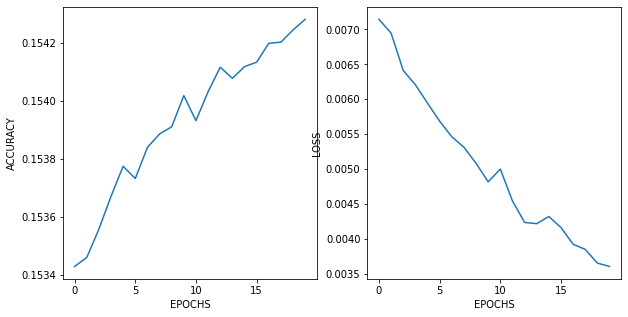

In [153]:
EPOCHS = 20
model.fit(dataset, epochs=EPOCHS, verbose=1)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.plot(model.history.history['accuracy'])

plt.subplot(122)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.plot(model.history.history['loss'])

In [154]:
sentence_generation('콜라를 먹을까? 스프라이트를 먹을까?')

sentence_generation("아는 형이 코카콜라 주식을 샀는데, 과연 올랐을까?")

입력 : 콜라를 먹을까? 스프라이트를 먹을까?
출력 : 있을 거라 믿어요 .
입력 : 아는 형이 코카콜라 주식을 샀는데, 과연 올랐을까?
출력 : 그런 남자 버리고 이런 느낌 안 주는 사람 만나세요 .


'그런 남자 버리고 이런 느낌 안 주는 사람 만나세요 .'

나 남잔데?

In [156]:
sentence_generation('그림을 그리고 싶어')

sentence_generation("내가 그림으로 돈을 벌 수 있을지가 의문이야")

sentence_generation('원화를 그릴까? 일러스트를 그릴까?')

sentence_generation("역시 그림은 비전이 없어. 3D와 애니메이션으로 간다")

입력 : 그림을 그리고 싶어
출력 : 후회없으실 거라 믿어요 .
입력 : 내가 그림으로 돈을 벌 수 있을지가 의문이야
출력 : 환승은 30분 안에
입력 : 원화를 그릴까? 일러스트를 그릴까?
출력 : 처음 배우는게 중요해요 .
입력 : 역시 그림은 비전이 없어. 3D와 애니메이션으로 간다
출력 : 후련하다니 다행이에요 .


'후련하다니 다행이에요 .'

오...첫번째와 마지막 질문에 대한 대답이 정말 맘에 드네요

근데 데이터셋이 대부분 연애 관련 QnA였다는 거와,
<br/>
label이 결국 뭐였는지 알아내지 못 했다는 게 좀 아쉽네요

<br/>

그래서 찾아봤습니다

https://youtube.com/playlist?list=PLNgPShXbeBwErzwo1z_zYobnukjrlVUmP

https://youtube.com/playlist?list=PLr_ki3_GfpZNXm_BlKRzaLZDdJy6cx3wF

https://youtube.com/playlist?list=PLaH0RII4IUnBmKgpHufCvi8UG0w9z1m0i
<br/>
2부 부터 강의자료 있으니 참고하기

https://youtube.com/playlist?list=PLzMcBGfZo4-ndH9FoC4YWHGXG5RZekt-Q

<br/>
aiffel에서 배운 뉴스 요약봇[E_08]이나, 영화 감상평 긍정 부정 판별기 [E_06] 등을 이용해서 데이터 프레임을 늘리고,
이를 통해 좀 더 좋은 성능의 인공지능을 만들고자 한다

# 회고

이번에 배운 내용은 너무 낯설어가지고 감히 커스텀할 엄두가 안 나더군요
<br/>
그래서 챗봇을 구현하는 여러 강의 자료를 찾았습니다

몇몇은 기존에 제게 익순한 방식으로 모델을 만드는 방법을 사용하기 때문에 커스텀을 할 수 있을 거 같습니다
<br/>
뭐 간단한 만큼 드라마틱한 성능 개선이 이뤄지지 않을 수 있지만,
<br/>
해당 강의를 따라하면서 이번 EX노드를 더 잘 이해할 수 있을 거 같습니다
